## Pandas

#### Series

In [2]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'2.0.3'

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [3]:
data = pd.Series(
    [0.25, 0.5, 0.75, 1.0],
    index=['a', 'b', 'c', 'd']
)
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [4]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [5]:
pd.Series({2: 'a', 1: 'b', 3: 'c'})

2    a
1    b
3    c
dtype: object

In [6]:
pd.Series({2: 'a', 1: 'b', 3: 'c'}, index=[3,2])

3    c
2    a
dtype: object

In [7]:
population = pd.Series(
    {
        'California': 38332521,
        'Texas': 26448193,
        'New York': 19651127,
        'Florida': 19552860,
        'Illinois': 12882135
    }
)

area = pd.Series(
    {
        'California': 423967,
        'Texas': 695662,
        'New York': 141297,
        'Florida': 170312,
        'Illinois': 149995
    }
)

states = pd.DataFrame(
    {
        'population': population,
        'area': area
    }
)
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [8]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [9]:
states.columns

Index(['population', 'area'], dtype='object')

In [11]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [12]:
# NaN: not a number
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [14]:
pd.DataFrame(
    np.random.rand(3, 2),
    columns=['foo', 'bar'],
    index=['a', 'b', 'c']
)

,foo,bar
a,0.409464,0.065929
b,0.528251,0.058436
c,0.952490,0.540992


In [15]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [16]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [17]:
idx = pd.Index([2, 3, 5, 7, 11])
idx

Index([2, 3, 5, 7, 11], dtype='int64')

In [18]:
idx[1]

3

In [19]:
idx[::2]

Index([2, 5, 11], dtype='int64')

In [20]:
print(idx.size, idx.shape, idx.ndim, idx.dtype)

5 (5,) 1 int64


In [21]:
# index不能修改
idx[1] = 0

TypeError: Index does not support mutable operations

In [22]:
idx1 = pd.Index([1, 3, 5, 7, 9])
idx2 = pd.Index([2, 3, 5, 7, 11])

In [23]:
idx1 & idx2

Index([0, 3, 5, 7, 9], dtype='int64')

In [26]:
idx1.intersection(idx2)

Index([3, 5, 7], dtype='int64')

In [24]:
idx1 | idx2

Index([3, 3, 5, 7, 11], dtype='int64')

In [27]:
idx1.union(idx2)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [25]:
idx1 ^ idx2

Index([3, 0, 0, 0, 2], dtype='int64')

In [28]:
idx1.difference(idx2)

Index([1, 9], dtype='int64')

In [29]:
idx1.symmetric_difference(idx2)

Index([1, 2, 9, 11], dtype='int64')

In [32]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [33]:
data['b']

0.5

In [34]:
'a' in data

True

In [35]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [36]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [37]:
data['e'] = 1.25

In [38]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [40]:
data.loc['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [42]:
data.iloc[0:2]

a    0.25
b    0.50
dtype: float64

In [43]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A.add(B, fill_value=0) # fillna with 0

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [44]:
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [45]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('BAC'))
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,19.0,6.0,11.5
1,13.0,16.0,14.5
2,16.5,17.5,12.5


In [51]:
A

,A,B
0,18,4
1,13,7


In [52]:
B

,B,A,C
0,2,1,1
1,9,0,4
2,7,6,2


In [50]:
A.stack().mean()

10.5

In [53]:
A = np.random.randint(10, size=(3, 4))
A

array([[6, 0, 2, 5],
       [6, 4, 9, 9],
       [5, 3, 4, 0]])

In [54]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 0,  4,  7,  4],
       [-1,  3,  2, -5]])

In [55]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,4,7,4
2,-1,3,2,-5


In [56]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,6,0,2,5
1,2,0,5,5
2,2,0,1,-3


In [57]:
halfow = df.iloc[0, ::2]
halfow

Q    6
S    2
Name: 0, dtype: int64

In [58]:
df - halfow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,0.0,NaN,7.0,NaN
2,-1.0,NaN,2.0,NaN


In [59]:
df

,Q,R,S,T
0,6,0,2,5
1,6,4,9,9
2,5,3,4,0


In [2]:
# 運算dtype為object的速度會較慢
for dtype in ['object', 'int']:
    print("dtype = ", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype =  object
93.7 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype =  int
2.14 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [3]:
vals = np.array([1, np.nan, 3, 4])
vals.dtype

dtype('float64')

In [4]:
1 + np.nan

nan

In [6]:
# 聚合計算忽略nan
print("sum = ", np.nansum(vals))
print("min = ", np.nanmin(vals))
print("max = ", np.nanmax(vals))

sum =  8.0
min =  1.0
max =  4.0


In [7]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [8]:
# forward_fill
data.fillna(method="ffill")

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [9]:
# back_fill
data.fillna(method="bfill")

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [10]:
df = pd.DataFrame(
    [
        [1, np.nan, 2],
        [2, 3, 5],
        [np.nan, 4, 6]
    ]
)
# NOTE: 如果前一個值也不能用，則保留空值
df.fillna(method="ffill", axis=1)

,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


#### 多重索引 

In [11]:
index = [
    ('California', 2000),
    ('California', 2010),
    ('New York', 2000),
    ('New York', 2010),
    ('Texas', 2000),
    ('Texas', 2010)
]
population = [
    33871648,
    37253956,
    18976457,
    19378102,
    20851820,
    25145561
]
pop = pd.Series(population, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [12]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [13]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [14]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [15]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [16]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [3]:
index = pd.MultiIndex.from_product(
    [[2013, 2014], [1, 2]],
    names=['year', 'visit']
)
columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
    names=['subject', 'type']
)
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.6  49.0  36.9  36.0  36.8
     2      44.0  37.0  31.0  37.5  34.0  37.8
2014 1      41.0  38.6  47.0  36.4  41.0  36.0
     2      52.0  36.8  24.0  37.1  35.0  36.5

#### IndexSlice

In [18]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,40.0,38.0,43.0
2014,1,56.0,35.0,44.0


In [19]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.185141
      2      0.087447
c     1      0.082403
      2      0.612875
b     1      0.483912
      2      0.010833
dtype: float64

In [20]:
# NOTE: 如果索引沒有排序，切片可能會失敗
data['a':'b']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [21]:
data = data.sort_index()
data['a':'b']

char  int
a     1      0.185141
      2      0.087447
b     1      0.483912
      2      0.010833
dtype: float64

In [7]:
health_data.mean(level='year')

TypeError: mean() got an unexpected keyword argument 'level'

In [6]:
health_data.groupby(level='year').mean()

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     43.5  37.3  40.0  37.20  35.0  37.30
2014     46.5  37.7  35.5  36.75  38.0  36.25

#### others
- pd.Panel(三維資料)
- pd.Panel4D(四維資料)

#### 資料合併

In [12]:
def make_df(col, ind):
    data = {
        c: [str(c) + str(i) for i in ind]
        for c in col
    }
    return pd.DataFrame(data, ind)

In [13]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print("df1:")
print(df1)
print("df2:")
print(df2)
print("pd.concat([df1, df2]):")
print(pd.concat([df1, df2]))


df1:
    A   B
1  A1  B1
2  A2  B2
df2:
    A   B
3  A3  B3
4  A4  B4
pd.concat([df1, df2]):
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [14]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print("df3:")
print(df3)
print("df4:")
print(df4)
print("pd.concat([df3, df4], axis=1):")
print(pd.concat([df3, df4], axis=1))

df3:
    A   B
0  A0  B0
1  A1  B1
df4:
    C   D
0  C0  D0
1  C1  D1
pd.concat([df3, df4], axis=1):
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


**NOTE:** pd.concat會保留重複的索引
處理方式:
- 重複情形當作錯誤: verify_integrity = True
- 忽略索引: ignore_index = True(結果會使用新的整數索引)
- 加多重索引鍵: 使用keys分別給定各資料來源標籤(結果會是MultiIndex)

In [15]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index
print("x:")
print(x)
print("y:")
print(y)
print("pd.concat([x, y]):")
print(pd.concat([x, y]))

x:
    A   B
0  A0  B0
1  A1  B1
y:
    A   B
0  A2  B2
1  A3  B3
pd.concat([x, y]):
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [16]:
# 當作錯誤
pd.concat([x, y], verify_integrity=True)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')

In [17]:
# 忽略索引
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [18]:
# 多重索引鍵
pd.concat([x, y], keys=["x", "y"])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [21]:
df5 = make_df("ABC", [1, 2])
df6 = make_df("BCD", [3, 4])
print("df5:")
print(df5)
print("df6:")
print(df6)
print("pd.concat([df5, df6])")
print(pd.concat([df5, df6]))

df5:
    A   B   C
1  A1  B1  C1
2  A2  B2  C2
df6:
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [22]:
# 使用join參數改變串接方式
pd.concat([df5, df6], join="inner") # default = "outer"

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


#### GroupBy

In [5]:
import seaborn as sns

In [6]:
planets = sns.load_dataset("planets")

In [7]:
planets.shape

(1035, 6)

In [8]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [10]:
planets.groupby("method")["orbital_period"].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [11]:
for (method, group) in planets.groupby("method"):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [13]:
planets.groupby("method")["year"].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [14]:
rng = np.random.RandomState(0)
df = pd.DataFrame(
    {
        "key": ["A", "B", "C", "A", "B", "C"],
        "data1": range(6),
        "data2": rng.randint(0, 10, 6)
    }
)
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [15]:
df.groupby("key").aggregate(["min", "max"])

data1     data2    
      min max   min max
key                    
A       0   3     3   5
B       1   4     0   7
C       2   5     3   9

In [16]:
def filter_func(x):
    return x["data2"].std() > 4

In [17]:
df.groupby("key").std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [18]:
df.groupby("key").filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [19]:
df.groupby("key").transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [20]:
def norm_by_data2(x):
    x["data1"] /= x["data2"].sum()
    return x

In [21]:
df.groupby("key").apply(norm_by_data2)

key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

In [22]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


In [23]:
df2 = df.set_index("key")
mapping = {"A": "vowel", "B": "consonant", "C": "consonant"}

In [24]:
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,19
vowel,3,8


In [25]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [26]:
decade = 10 * (planets["year"] // 10)
decade = decade.astype(str) + "s"
decade.name = "decade"

In [27]:
planets.groupby(["method", decade])["number"].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


#### Pivot Table

In [28]:
titanic = sns.load_dataset("titanic")

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [32]:
# 把數值分持幾個區間
age = pd.cut(titanic["age"], [0, 18, 80])

titanic.pivot_table("survived", ["sex", age], "class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [33]:
# 計算分位數
fare = pd.qcut(titanic["fare"], 2)
titanic.pivot_table("survived", ["sex", age], [fare, "class"])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [34]:
data = ["peter", "Paul", None, "MARY", "gUIDO"]
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [35]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [36]:
data2 = ["peter", np.nan, "MARY"]
pd.Series(data2).str.capitalize()

0    Peter
1      NaN
2     Mary
dtype: object

In [37]:
monte = pd.Series(
    [
        "Graham Chapman",
        "John Cleese",
        "Terry Gilliam",
        "Eric Idle",
        "Terry Jones",
        "Michael Palin"
    ]
)
full_monte = pd.DataFrame(
    {
        "name": monte,
        "info": [
            "B|C|D",
            "B|D",
            "A|C",
            "B|D",
            "B|C",
            "B|C|D"
        ]
    }
)
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [38]:
# 快速把指示符切割成DataFrame
full_monte["info"].str.get_dummies("|")

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


**Working with Text Data:** https://pandas.pydata.org/docs/user_guide/text.html

#### Time Series

In [39]:
start_date = pd.to_datetime("4th of July, 2015")
start_date

Timestamp('2015-07-04 00:00:00')

In [40]:
start_date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [41]:
index = pd.DatetimeIndex(["2014-07-04", "2014-08-04", "2015-07-04", "2015-08-04"])
date_sr = pd.Series([0, 1, 2, 3], index=index)
date_sr

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [42]:
date_sr["2014-07-04": "2015-07-04"]

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [43]:
date_sr["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

In [46]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), "4th of July, 2015", "2015-Jul-6", "07-07-2015", "20150708"])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [47]:
# PeriodIndex
dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [48]:
# TimedeltaIndex
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [49]:
pd.date_range("2015-07-03", "2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range("2015-07-03", periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range("2015-07-03", periods=8, freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [52]:
pd.period_range("2015-07", periods=8, freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [54]:
pd.timedelta_range(0, periods=10, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [55]:
# 結合小時跟分鐘的頻率
pd.timedelta_range(0, periods=9, freq="2H30T") # 2小時30分鐘

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [56]:
from pandas.tseries.offsets import BDay # 工作日偏移值
pd.date_range("2015-07-01", periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

#### 重新取樣、偏移、窗口設定

In [60]:
from pandas_datareader import data

In [65]:
# https://stackoverflow.com/questions/74834834/pdr-datareader-typeerror-string-indices-must-be-integers
ge = data.get_data_yahoo("GE", start="2022-01-01", end="2022-03-31")
ge.head()

TypeError: string indices must be integers, not 'str'

**重新取樣**
- resample: 資料聚合計算
- asfreq: 資料選擇

**時間位移**
- shift: 資料移位
- tshift: 索引移位

**計算ROI**
ROI = 100 * (stock.tshift(-365) / stock - 1)

**滾動窗口**
- rolling

**Reference:** https://pandas.pydata.org/docs/user_guide/timeseries.html

#### 西雅圖自行車數量

In [67]:
data = pd.read_csv("bicycle/FremontBridge.csv", index_col="Date", parse_dates=True)
data.head()

/tmp/ipykernel_823/570182220.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("bicycle/FremontBridge.csv", index_col="Date", parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [68]:
data.columns = ["total", "east", "west"]
data.dropna().describe()

,total,east,west
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

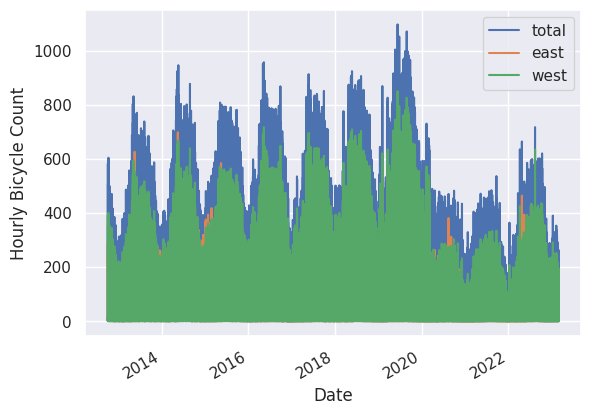

In [70]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle Count")

Text(0, 0.5, 'Weekly bicycle count')

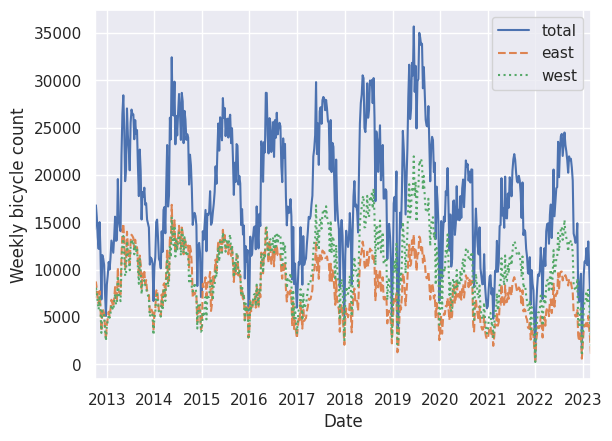

In [72]:
weekly = data.resample("W").sum()
weekly.plot(style=["-", "--", ":"])
plt.ylabel("Weekly bicycle count")

Text(0, 0.5, 'mean hourly count')

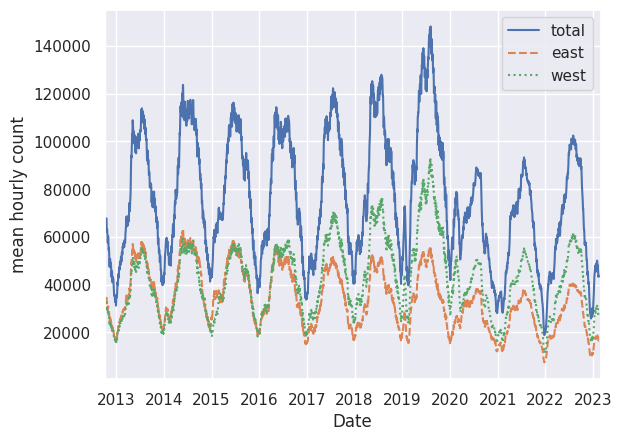

In [73]:
daily = data.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=["-", "--", ":"])
plt.ylabel("mean hourly count")

<Axes: xlabel='Date'>

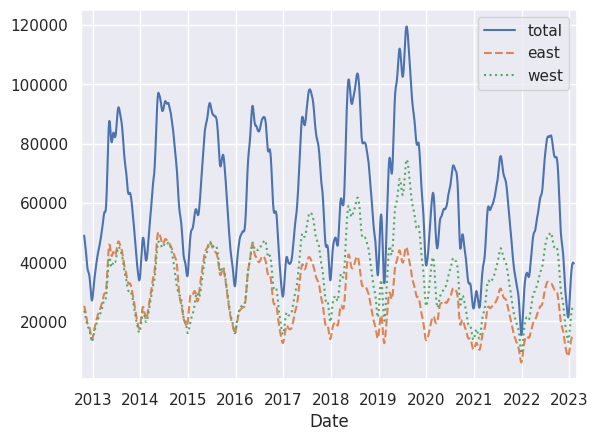

In [74]:
# Gaussian window
daily.rolling(50, center=True, win_type="gaussian").sum(std=10).plot(style=["-", "--", ":"]) # 窗口:50天; 高斯寬度:10天

<Axes: xlabel='time'>

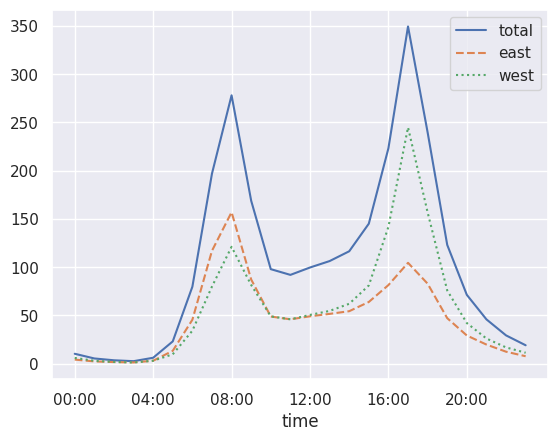

In [75]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=["-", "--", ":"])

<Axes: >

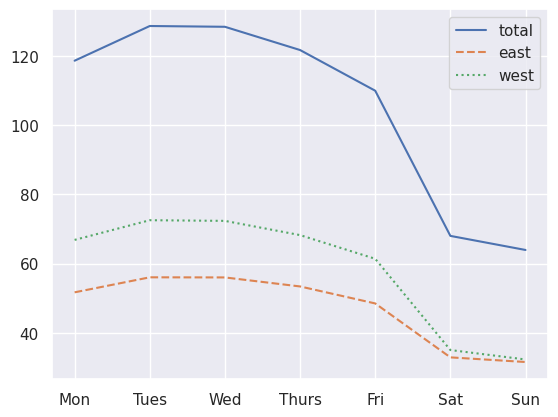

In [76]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
by_weekday.plot(style=["-", "--", ":"])

In [77]:
weekend = np.where(data.index.weekday < 5, "Weekday", "Weekend")
by_time = data.groupby([weekend, data.index.time]).mean()

<Axes: title={'center': 'Weekends'}, xlabel='time'>

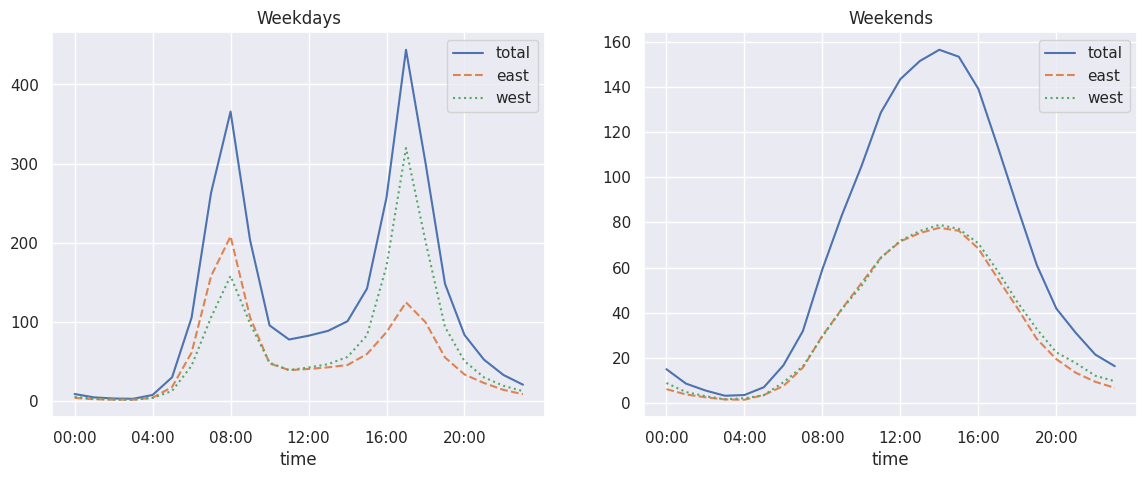

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc["Weekday"].plot(ax=ax[0], title="Weekdays", xticks=hourly_ticks, style=["-", "--", ":"])
by_time.loc["Weekend"].plot(ax=ax[1], title="Weekends", xticks=hourly_ticks, style=["-", "--", ":"])

#### eval & query

In [81]:
rng = np.random.RandomState(42)
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [82]:
%timeit df1 + df2 + df3 + df4

67.5 ms ± 6.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
%timeit pd.eval("df1 + df2 + df3 + df4")

66.1 ms ± 3.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
np.allclose(df1 + df2 + df3 + df4, pd.eval("df1 + df2 + df3 + df4"))

True

In [86]:
df = pd.DataFrame(rng.rand(1000, 3), columns=["A", "B", "C"])
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


In [87]:
result1 = (df["A"] + df["B"]) / (df["C"] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
result3 = df.eval("(A + B) / (C - 1)")

In [88]:
np.allclose(result1, result2)

True

In [89]:
np.allclose(result2, result3)

True

In [90]:
df.eval("D = (A + B) / C", inplace=True)
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,24.095868
1,0.330858,0.412879,0.441564,1.684325
2,0.689047,0.559068,0.230350,5.418335
3,0.290486,0.695479,0.852587,1.156439
4,0.424280,0.534344,0.245216,3.909296


In [91]:
column_mean = df.mean(1)
result1 = df["A"] + column_mean
result2 = df.eval("A + @column_mean") # NOTE: DataFrame.eval()，加`@`可使用變數；pd.eval()不可使用
np.allclose(result1, result2)

True

In [93]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval("df[(df.A < 0.5) & (df.B < 0.5)]")
np.allclose(result1, result2)

True

In [94]:
result3 = df.query("A < 0.5 and B < 0.5")
np.allclose(result2, result3)

True

In [95]:
Cmean = df["C"].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query("A < @Cmean and B < @Cmean")
np.allclose(result1, result2)

True

- **Reference:** https://pandas.pydata.org/docs/user_guide/enhancingperf.html
- **PyVideo** https://pyvideo.org/